In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
headers = ['id', 'date', 'text', 'likes', 'retweets', 'username'] # making a list of headers before reading csv
df = pd.read_csv('maennerwelten_raw.csv', header=None, names=headers) # reading csv with custom headers

In [3]:
df.head(5)

,id,date,text,likes,retweets,username
0,1262168183584292864,2020-05-17 23:48:39,#maennerwelten Insbesondere die beiden vergang...,1,0,AchtungH
1,1262167776195723270,2020-05-17 23:47:02,Haben wir es mit #maennerwelten ins Ausland ge...,2,0,deElstyr
2,1262166382554288129,2020-05-17 23:41:30,#maennerwelten Dass eine Frau einen Mann brauc...,1,0,AchtungH
3,1262160846727282688,2020-05-17 23:19:30,Mit 15 war ich verliebt. Wir haben uns geküsst...,2,0,AchtungH
4,1262159859719512069,2020-05-17 23:15:35,Ich habe vier Jahre lang in einer Tankstelle g...,0,1,AchtungH


In [4]:
df[df['text'].str.contains('ebay')] # noticed some spam in row 148

,id,date,text,likes,retweets,username
148,1261979050870018048,2020-05-17 11:17:06,https://t.co/GMTtkJX321 Ebay-Top Angebot.\nPUM...,0,0,WillHaben3
1197,1261324189597908994,2020-05-15 15:54:55,Ein ganz normaler Tag auf eBay pt. 3 #maennerw...,1,0,FrauPausDamR1


In [5]:
df = df.drop(df.index[148]) # drop spam

In [6]:
df[df['text'].str.contains('ebay')] # looks better

,id,date,text,likes,retweets,username
1197,1261324189597908994,2020-05-15 15:54:55,Ein ganz normaler Tag auf eBay pt. 3 #maennerw...,1,0,FrauPausDamR1


In [7]:
df.describe()

,id,likes,retweets
count,1.999000e+03,1999.000000,1999.000000
mean,1.261474e+18,13.092046,1.210105
std,2.658866e+14,72.488124,6.498239
min,1.261169e+18,0.000000,0.000000
25%,1.261256e+18,0.000000,0.000000
50%,1.261373e+18,2.000000,0.000000
75%,1.261635e+18,5.000000,0.000000
max,1.262168e+18,1817.000000,111.000000


In [8]:
most_liked = df.groupby('id').agg('max').sort_values('likes', ascending=False).head(30)
most_retweeted = df.groupby('id').agg('max').sort_values('retweets', ascending=False).head(30)

In [9]:
pd.set_option('display.max_colwidth', -1) # show full text instead of truncating

In [10]:
most_liked[['text','username','likes']] # the 30 most liked tweets in the dataset

,text,username,likes
id,,,
1261261377261486086,"Da musste ich heute Morgen noch stark nachdenken, ob mir überhaupt etwas zu #maennerwelten einfällt.\nSo war das jetzt nicht gedacht.",fraupfoetchen,1817
1261245460523646977,"Als ich etwa 9 oder 10 Jahre alt war, hat mir ein fremder, entgegenkommender Mann mitten auf der Straße im Gedränge zwischen die Beine gefasst. Zielsicher. Mit zwei Fingern. Ich hatte nicht drum gebeten. Obviously. #Männerwelten",KuttnerSarah,1266
1261359855765422084,"Da Belästigung von Frauen nicht in das Weltbild von - ja, ausschließlich - männlichen Wesen hier nicht passt oder sie sich wohl eventuell angesprochen fühlen, wird frau kleingeredet und ihr Lügen unterstellt. Und ihr wundert euch über die Notwendigkeit von #maennerwelten",fraupfoetchen,949
1261529935421870080,"Guten Morgen, #Männerwelten. https://t.co/S7eTWXpwQ7",_LilliFischer,902
1261358953830797316,Eine Frage an die Frauen und alle Betroffenen die sich äußern möchten: Hat sich bei euch je ein Mann für seine Belästigungen Entschuldigt? Also echte Einsicht und Reue gezeigt? #maennerwelten,fuchsbuerste,813
1261216769764622336,"Die Entrüstung nach #maennerwelten für eine persönliche Vendetta zu nutzen ist nicht nur traurig, sondern bewirkt auch, dass dieses Thema massiv für persönliche Feindschaften missbraucht wird / werden kann.",StaiyLIVE,662
1261181743765295105,"Mein Beitrag zum Thema #maennerwelten auf Twitch. Nein, ich kenne ihn nicht und nein, ich bin ihm vorher noch nie begegnet. Wir waren beide live on stream und haben in gegnerischen Teams gespielt.\n\nhttps://t.co/y9ZGe1GrK1",ClaraSeufzer,600
1261269357918932993,"Tut mir leid, dass der Tweet nicht in das von dir tolerierte Zeitfenster fällt. Am besten hätte ich das direkt 1988 getwittert, entschuldige. #Männerwelten https://t.co/JipGZAKNwK",KuttnerSarah,580
1261252706859126784,"Meint ihr der damals 17jährige Typ, der mir als ich 13 war und mich auf einer Feier gebückt habe, um meine Schuhe zuzubinden, in die Unterhose gegriffen hat, teilt gerade auch irgendwo #Männerwelten?",TanjaSagt,537


In [11]:
most_retweeted[['text','username','retweets']] # the 30 most retweeted tweets in the dataset

,text,username,retweets
id,,,
1261331649113067522,"Mann aus Mali wollte noch bei #männerwelten genannt werden: Er zerrte eine Frau in #Leonberg in ein Gebüsch+vergewaltigte sie, vorher belästigte er verbal+massiv tätlich in #Regensburg 2 andere Frauen. Sie konnten sich wehren+befreien = #Alltagsrassismus!\nhttps://t.co/3JCF8ahwQY",BlondJedi,111
1261222374067908608,"„Darum geht es hier nicht.“ Problemstellungen und alltägliche Vorfälle, die außerhalb vom Beitrag von #maennerwelten thematisiert werden, um sexuellen Missbrauch/ Belästigung von Frauen fälschlicherweise zu diskreditieren oder gleichzustellen. \nEin Thread.",SuperFreeee,102
1261903274736787456,"Wollt ihr mal sehen, wie #Männerwelten übersetzt in Deutsche #Gebärdensprache aussieht? Danke an Svea Loy und Kunigunde Schindler für die Ally zu diesem Thema, um auch Gehörlosen das Thema zugänglich zu machen! ❤️ https://t.co/pdgLBkZfAF",EinAugenschmaus,96
1261181743765295105,"Mein Beitrag zum Thema #maennerwelten auf Twitch. Nein, ich kenne ihn nicht und nein, ich bin ihm vorher noch nie begegnet. Wir waren beide live on stream und haben in gegnerischen Teams gespielt.\n\nhttps://t.co/y9ZGe1GrK1",ClaraSeufzer,88
1261358953830797316,Eine Frage an die Frauen und alle Betroffenen die sich äußern möchten: Hat sich bei euch je ein Mann für seine Belästigungen Entschuldigt? Also echte Einsicht und Reue gezeigt? #maennerwelten,fuchsbuerste,84
1261245460523646977,"Als ich etwa 9 oder 10 Jahre alt war, hat mir ein fremder, entgegenkommender Mann mitten auf der Straße im Gedränge zwischen die Beine gefasst. Zielsicher. Mit zwei Fingern. Ich hatte nicht drum gebeten. Obviously. #Männerwelten",KuttnerSarah,82
1261575461286678529,"trans-, sexarbeits-, islamfeindlich &amp; AfD-nah.. bitte BITTE kooperiert mit anderen Organisationen 🙏 #männerwelten https://t.co/TbjRNV1zEC",MsOeming,70
1261211384924209154,"Sorry, ich bin superlangsam. Aber ich kam erst jetzt dazu &amp; ich möchte noch ein paar Gedanken zu #maennerwelten formulieren \n\nIch werde ein wenig darauf eingehen, was ich gut finde, und was noch ergänzt werden könnte (Thread) \n\nWer es verpasst hat - siehe: https://t.co/egPmZ5bWDP",brodnig,65
1262110241195528199,"Ich bin wirklich und ernsthaft unsicher, was gleich passiert.\n\nAlles, was mir bleibt, ist meine Ehrlichkeit, wie immer, und das Vertrauen in meine Leser und darin, dass sie wissen, wie ich das hier meine. &lt;3\n\n""#Männerwelten - We love to entertain you""\n\nhttps://t.co/ZOoPLRTldJ",Ophelia_BDSM,48


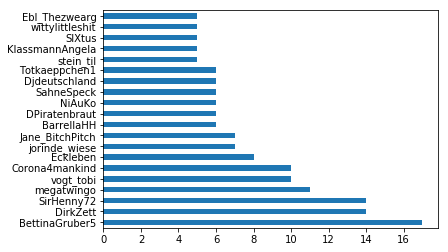

In [12]:
df['username'].value_counts()[:20].plot(kind='barh') # quick look on users who posted the most tweets

In [13]:
# cleaning the text of the tweet by removing hashtags, answers, special characters and numbers
def clean_tweet(text):
    text = ' '.join(re.sub("([#@][A-Za-z0-9]+)|([^A-Za-zäüöß0-9])|(\d+)|(\w+:\/\/\S+)", " ", text).split())
    return text

df['clean_tweet'] = df['text'].apply(lambda x: clean_tweet(x))
df.head(10)

,id,date,text,likes,retweets,username,clean_tweet
0,1262168183584292864,2020-05-17 23:48:39,"#maennerwelten Insbesondere die beiden vergangenen Schilderungen mögen subtiler und weniger schlimm anmuten als straight forward sexuelle Gewalt und Belästigung. Aber es gehört für mich trotzdem dazu, denn dies waren die (vergleichsweise wenigen) Momente in meinem Leben, in...",1,0,AchtungH,Insbesondere die beiden vergangenen Schilderungen mögen subtiler und weniger schlimm anmuten als straight forward sexuelle Gewalt und Belästigung Aber es gehört für mich trotzdem dazu denn dies waren die vergleichsweise wenigen Momente in meinem Leben in
1,1262167776195723270,2020-05-17 23:47:02,Haben wir es mit #maennerwelten ins Ausland geschafft?,2,0,deElstyr,Haben wir es mit ins Ausland geschafft
2,1262166382554288129,2020-05-17 23:41:30,"#maennerwelten Dass eine Frau einen Mann braucht, und sonst nicht normal wäre, ist in unserer Gesellschaft derart verankert. Als ich 14 war, fragte mich meine Schwester, warum ich nicht normal wäre und noch keinen Freund hätte. Eltern geschieden, ich beim Vater, Schwester... 1/2",1,0,AchtungH,Dass eine Frau einen Mann braucht und sonst nicht normal wäre ist in unserer Gesellschaft derart verankert Als ich war fragte mich meine Schwester warum ich nicht normal wäre und noch keinen Freund hätte Eltern geschieden ich beim Vater Schwester
3,1262160846727282688,2020-05-17 23:19:30,"Mit 15 war ich verliebt. Wir haben uns geküsst, uns gegenseitig ausgezogen (mehr nicht). Ich bin zu spät heimgekommen. Mein Papa hat mich als Flittchen beschimpft, weil ich das Kleid in der Eile auf links angezogen hatte und ""ich mich ja sofort ausgezogen hätte"". #maennerwelten",2,0,AchtungH,Mit war ich verliebt Wir haben uns geküsst uns gegenseitig ausgezogen mehr nicht Ich bin zu spät heimgekommen Mein Papa hat mich als Flittchen beschimpft weil ich das Kleid in der Eile auf links angezogen hatte und ich mich ja sofort ausgezogen hätte
4,1262159859719512069,2020-05-17 23:15:35,"Ich habe vier Jahre lang in einer Tankstelle gearbeitet. Der Mann der Betreiberin (ca. 60, Alkoholiker) hat mir immer wieder an die Brust, zwischen die Beine und an den Hintern gegriffen, trotz Protesten und Wegschlagen der Hand. #maennerwelten",0,1,AchtungH,Ich habe vier Jahre lang in einer Tankstelle gearbeitet Der Mann der Betreiberin ca Alkoholiker hat mir immer wieder an die Brust zwischen die Beine und an den Hintern gegriffen trotz Protesten und Wegschlagen der Hand
5,1262158127757221888,2020-05-17 23:08:42,"Gerade eben wurde mein FB mit dateanfragen von lb aus aus Taiwan vollgemüllt und heh, die sehen ja auch ganz süß aus. Vorgemerkt für einen Kurztrip. \n#Männerwelten",0,0,DirkZett,Gerade eben wurde mein FB mit dateanfragen von lb aus aus Taiwan vollgemüllt und heh die sehen ja auch ganz süß aus Vorgemerkt für einen Kurztrip ännerwelten
6,1262155371059318784,2020-05-17 22:57:44,"Ich hab gerade einen Kommentar bei Facebook zu #maennerwelten gelesen, dass Frauen ja alle selbst schuld sind, weil es ja Mütter sind, die diese so erzogen haben.\n\nGenug Internet für heute...",72,1,Quasselette,Ich hab gerade einen Kommentar bei Facebook zu gelesen dass Frauen ja alle selbst schuld sind weil es ja Mütter sind die diese so erzogen haben Genug Internet für heute
7,1262152233845694474,2020-05-17 22:45:16,"@Aeskulappirat @Stoertebeker68 @PiaPale Wenn Dein Bekanntenkreis so ""real"" ist, dass Du ihnen entfolgen kannst, solltest Du einfach mal wieder vor die Tür gehen. Das wirkliche Leben ist analog... und faszinierend.\n#Männerwelten",0,0,DirkZett,Wenn Dein Bekanntenkreis so real ist dass Du ihnen entfolgen kannst solltest Du einfach mal wieder vor die Tür gehen Das wirkliche Leben ist analog und faszinierend ännerwelten
8,1262151172565147648,2020-05-17 22:41:03,"@KuttnerSarah #maennerwelten\n6J-12J, er war mein Bruder. Ich habe erst gar nicht gewusst, was da passiert, gut fühle es sich nicht an. Dann Verdrängung. So erzogen worden, dass Mädchen nicht nein zu sagen

In [14]:
import nltk

In [15]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tweet_tokenized'] = df['clean_tweet'].apply(lambda x: tokenization(x.lower()))
df.head(10)


,id,date,text,likes,retweets,username,clean_tweet,tweet_tokenized
0,1262168183584292864,2020-05-17 23:48:39,"#maennerwelten Insbesondere die beiden vergangenen Schilderungen mögen subtiler und weniger schlimm anmuten als straight forward sexuelle Gewalt und Belästigung. Aber es gehört für mich trotzdem dazu, denn dies waren die (vergleichsweise wenigen) Momente in meinem Leben, in...",1,0,AchtungH,Insbesondere die beiden vergangenen Schilderungen mögen subtiler und weniger schlimm anmuten als straight forward sexuelle Gewalt und Belästigung Aber es gehört für mich trotzdem dazu denn dies waren die vergleichsweise wenigen Momente in meinem Leben in,"[insbesondere, die, beiden, vergangenen, schilderungen, mögen, subtiler, und, weniger, schlimm, anmuten, als, straight, forward, sexuelle, gewalt, und, belästigung, aber, es, gehört, für, mich, trotzdem, dazu, denn, dies, waren, die, vergleichsweise, wenigen, momente, in, meinem, leben, in]"
1,1262167776195723270,2020-05-17 23:47:02,Haben wir es mit #maennerwelten ins Ausland geschafft?,2,0,deElstyr,Haben wir es mit ins Ausland geschafft,"[haben, wir, es, mit, ins, ausland, geschafft]"
2,1262166382554288129,2020-05-17 23:41:30,"#maennerwelten Dass eine Frau einen Mann braucht, und sonst nicht normal wäre, ist in unserer Gesellschaft derart verankert. Als ich 14 war, fragte mich meine Schwester, warum ich nicht normal wäre und noch keinen Freund hätte. Eltern geschieden, ich beim Vater, Schwester... 1/2",1,0,AchtungH,Dass eine Frau einen Mann braucht und sonst nicht normal wäre ist in unserer Gesellschaft derart verankert Als ich war fragte mich meine Schwester warum ich nicht normal wäre und noch keinen Freund hätte Eltern geschieden ich beim Vater Schwester,"[dass, eine, frau, einen, mann, braucht, und, sonst, nicht, normal, wäre, ist, in, unserer, gesellschaft, derart, verankert, als, ich, war, fragte, mich, meine, schwester, warum, ich, nicht, normal, wäre, und, noch, keinen, freund, hätte, eltern, geschieden, ich, beim, vater, schwester]"
3,1262160846727282688,2020-05-17 23:19:30,"Mit 15 war ich verliebt. Wir haben uns geküsst, uns gegenseitig ausgezogen (mehr nicht). Ich bin zu spät heimgekommen. Mein Papa hat mich als Flittchen beschimpft, weil ich das Kleid in der Eile auf links angezogen hatte und ""ich mich ja sofort ausgezogen hätte"". #maennerwelten",2,0,AchtungH,Mit war ich verliebt Wir haben uns geküsst uns gegenseitig ausgezogen mehr nicht Ich bin zu spät heimgekommen Mein Papa hat mich als Flittchen beschimpft weil ich das Kleid in der Eile auf links angezogen hatte und ich mich ja sofort ausgezogen hätte,"[mit, war, ich, verliebt, wir, haben, uns, geküsst, uns, gegenseitig, ausgezogen, mehr, nicht, ich, bin, zu, spät, heimgekommen, mein, papa, hat, mich, als, flittchen, beschimpft, weil, ich, das, kleid, in, der, eile, auf, links, angezogen, hatte, und, ich, mich, ja, sofort, ausgezogen, hätte]"
4,1262159859719512069,2020-05-17 23:15:35,"Ich habe vier Jahre lang in einer Tankstelle gearbeitet. Der Mann der Betreiberin (ca. 60, Alkoholiker) hat mir immer wieder an die Brust, zwischen die Beine und an den Hintern gegriffen, trotz Protesten und Wegschlagen der Hand. #maennerwelten",0,1,AchtungH,Ich habe vier Jahre lang in einer Tankstelle gearbeitet Der Mann der Betreiberin ca Alkoholiker hat mir immer wieder an die Brust zwischen die Beine und an den Hintern gegriffen trotz Protesten und Wegschlagen der Hand,"[ich, habe, vier, jahre, lang, in, einer, tankstelle, gearbeitet, der, mann, der, betreiberin, ca, alkoholiker, hat, mir, immer, wieder, an, die, brust, zwischen, die, beine, und, an, den, hintern, gegriffen, trotz, protesten, und, wegschlagen, der, hand]"
5,1262158127757221888,2020-05-17 23:08:42,"Gerade eben wurde mein FB mit dateanfragen von lb aus aus Taiwan vollgemüllt und heh, die sehen ja auch ganz süß aus. Vorgemerkt für einen Kurztrip. \n#Männerwelten",0,0,DirkZett,Gerade eben wurde mein FB mit dateanfragen von lb aus aus Taiwan vollgemüllt und heh die se

In [16]:
stopword = nltk.corpus.stopwords.words('german') + ['ja', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'x', 'j', 'hh']

In [17]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['tweet_nostopwords'] = df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,id,date,text,likes,retweets,username,clean_tweet,tweet_tokenized,tweet_nostopwords
0,1262168183584292864,2020-05-17 23:48:39,"#maennerwelten Insbesondere die beiden vergangenen Schilderungen mögen subtiler und weniger schlimm anmuten als straight forward sexuelle Gewalt und Belästigung. Aber es gehört für mich trotzdem dazu, denn dies waren die (vergleichsweise wenigen) Momente in meinem Leben, in...",1,0,AchtungH,Insbesondere die beiden vergangenen Schilderungen mögen subtiler und weniger schlimm anmuten als straight forward sexuelle Gewalt und Belästigung Aber es gehört für mich trotzdem dazu denn dies waren die vergleichsweise wenigen Momente in meinem Leben in,"[insbesondere, die, beiden, vergangenen, schilderungen, mögen, subtiler, und, weniger, schlimm, anmuten, als, straight, forward, sexuelle, gewalt, und, belästigung, aber, es, gehört, für, mich, trotzdem, dazu, denn, dies, waren, die, vergleichsweise, wenigen, momente, in, meinem, leben, in]","[insbesondere, beiden, vergangenen, schilderungen, mögen, subtiler, weniger, schlimm, anmuten, straight, forward, sexuelle, gewalt, belästigung, gehört, trotzdem, vergleichsweise, wenigen, momente, leben]"
1,1262167776195723270,2020-05-17 23:47:02,Haben wir es mit #maennerwelten ins Ausland geschafft?,2,0,deElstyr,Haben wir es mit ins Ausland geschafft,"[haben, wir, es, mit, ins, ausland, geschafft]","[ausland, geschafft]"
2,1262166382554288129,2020-05-17 23:41:30,"#maennerwelten Dass eine Frau einen Mann braucht, und sonst nicht normal wäre, ist in unserer Gesellschaft derart verankert. Als ich 14 war, fragte mich meine Schwester, warum ich nicht normal wäre und noch keinen Freund hätte. Eltern geschieden, ich beim Vater, Schwester... 1/2",1,0,AchtungH,Dass eine Frau einen Mann braucht und sonst nicht normal wäre ist in unserer Gesellschaft derart verankert Als ich war fragte mich meine Schwester warum ich nicht normal wäre und noch keinen Freund hätte Eltern geschieden ich beim Vater Schwester,"[dass, eine, frau, einen, mann, braucht, und, sonst, nicht, normal, wäre, ist, in, unserer, gesellschaft, derart, verankert, als, ich, war, fragte, mich, meine, schwester, warum, ich, nicht, normal, wäre, und, noch, keinen, freund, hätte, eltern, geschieden, ich, beim, vater, schwester]","[frau, mann, braucht, normal, wäre, unserer, gesellschaft, derart, verankert, fragte, schwester, warum, normal, wäre, freund, hätte, eltern, geschieden, beim, vater, schwester]"
3,1262160846727282688,2020-05-17 23:19:30,"Mit 15 war ich verliebt. Wir haben uns geküsst, uns gegenseitig ausgezogen (mehr nicht). Ich bin zu spät heimgekommen. Mein Papa hat mich als Flittchen beschimpft, weil ich das Kleid in der Eile auf links angezogen hatte und ""ich mich ja sofort ausgezogen hätte"". #maennerwelten",2,0,AchtungH,Mit war ich verliebt Wir haben uns geküsst uns gegenseitig ausgezogen mehr nicht Ich bin zu spät heimgekommen Mein Papa hat mich als Flittchen beschimpft weil ich das Kleid in der Eile auf links angezogen hatte und ich mich ja sofort ausgezogen hätte,"[mit, war, ich, verliebt, wir, haben, uns, geküsst, uns, gegenseitig, ausgezogen, mehr, nicht, ich, bin, zu, spät, heimgekommen, mein, papa, hat, mich, als, flittchen, beschimpft, weil, ich, das, kleid, in, der, eile, auf, links, angezogen, hatte, und, ich, mich, ja, sofort, ausgezogen, hätte]","[verliebt, geküsst, gegenseitig, ausgezogen, mehr, spät, heimgekommen, papa, flittchen, beschimpft, kleid, eile, links, angezogen, sofort, ausgezogen, hätte]"
4,1262159859719512069,2020-05-17 23:15:35,"Ich habe vier Jahre lang in einer Tankstelle gearbeitet. Der Mann der Betreiberin (ca. 60, Alkoholiker) hat mir immer wieder an die Brust, zwischen die Beine und an den Hintern gegriffen, trotz Protesten und Wegschlagen der Hand. #maennerwelten",0,1,AchtungH,Ich habe vier Jahre lang in einer Tankstelle gearbeitet Der Mann der Betreiberin ca Alkoholiker hat mir immer wieder an die Brust zwischen die Beine und an den Hintern gegriffen trotz Protesten und Wegsc

In [18]:
from collections import Counter
Counter(" ".join(df["clean_tweet"]).lower().split()).most_common(100) # counting the 100 most common wirds within the tweets.

[('und', 1333),
 ('ich', 1315),
 ('die', 1035),
 ('das', 830),
 ('nicht', 791),
 ('ist', 711),
 ('der', 699),
 ('es', 686),
 ('zu', 681),
 ('ännerwelten', 596),
 ('in', 562),
 ('ein', 468),
 ('von', 455),
 ('mit', 444),
 ('so', 424),
 ('auch', 385),
 ('frauen', 373),
 ('dass', 368),
 ('auf', 359),
 ('mir', 359),
 ('mich', 348),
 ('sich', 334),
 ('als', 323),
 ('wie', 312),
 ('den', 310),
 ('aber', 296),
 ('was', 296),
 ('an', 292),
 ('sie', 282),
 ('sind', 281),
 ('war', 276),
 ('hat', 274),
 ('für', 265),
 ('eine', 259),
 ('wenn', 254),
 ('männer', 238),
 ('noch', 234),
 ('man', 233),
 ('im', 228),
 ('oder', 221),
 ('bei', 220),
 ('mal', 216),
 ('nur', 216),
 ('du', 198),
 ('er', 192),
 ('ja', 187),
 ('dem', 181),
 ('ihr', 177),
 ('wir', 175),
 ('habe', 172),
 ('haben', 169),
 ('über', 156),
 ('um', 155),
 ('schon', 152),
 ('thema', 150),
 ('da', 146),
 ('kann', 143),
 ('wird', 141),
 ('bin', 140),
 ('werden', 139),
 ('jetzt', 137),
 ('alle', 134),
 ('immer', 133),
 ('mehr', 131),
 ('

In [19]:
df.to_csv('maennerwelten_clean.csv', index=False)